# Decision Trees

Similar to SVM, decision trees are versatile and powerful --they can be used for classification and regression, and even multi-output tasks. 

In this chapter, we will train, visualize, and make predictions using Decision Trees. Then, we'll use CART trianing algo and discuss how to regualrize trees + use them for regression tasks. Lastly, we'll talk about some limitations of Decision Trees. 

## Training & Visualizing a Deicision Tree

this is an example of us training a decision tree:

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
X = iris.data[:,2:] # Petal length & width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth = 2)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2)

In [4]:
# You can visualize the trained Decision Tre by first using the export_graphviz() method 
# This outputs a graph definition file called iris_tree.dot

from sklearn.tree import export_graphviz


export_graphviz(
        tree_clf,
        out_file = image_path("iris_tree.dot"),
        feature_names = iris.feature_names[2:],
        class_names = iris.target_names,
        rounded = True,
        filled = True
    )

NameError: name 'image_path' is not defined

This is what the Decision Tree schema looks like: 

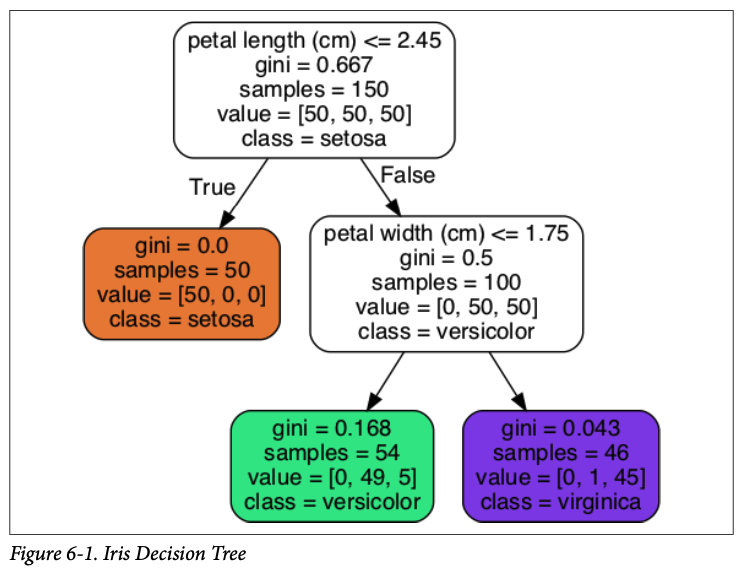

You start at the root node (depth 0) then you ask the first question: is petal length (cm)< 2.45? If False, go to the right, if True, go to the left --really, it's that simple. 

note: Decision trees require very little data preparation --no feature scaling or centering.

A node's value attribute tells you for how many training instances of each class a node applies to. Look at the thrid line for the previous image, it tells you how many instances fall into each class. 

A node's gini attibute measures impurity. If the class is "pure" (i.e., node applies to only one class -> left node in the example) its gini class is 0. But for the depth 2 left node, it has a gini score equal to 1 – (0/54)2 – (49/54)2 – (5/54)2 ≈ 0.168. 

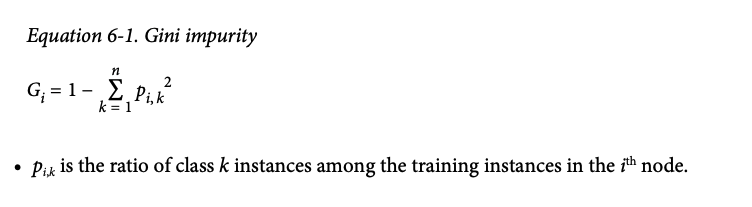

Another method of measuring impurity is discussed shortly. 

SKlearn uses CART algos which only produce binary trees. Other algos such as ID3 can produce Decision treees with ndoes that have more than two "children". 

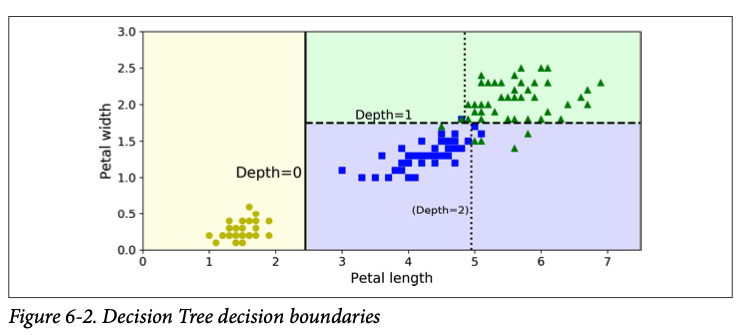

This figure shows you the decision boundaries for the Decision Tree. 

Thick vertical line is the decision boundary of the root node (depth = 0): petal length = 2.45cm --since left area is pure (only Iris-Setosa), it can't be split any further. 

However, the right area is impure --so depth -1 right node is capable of further spliting at petal width = 1.75cm (dashed lines)

If you were to set max_depth = 3, then the dotted lines would be demarcated, adding additional two boundaries 

## Model Interpretation: White vs Black Box

White box models: can be quite simply interpreted through nice and simiple classification rules --e.g., Decision trees

Black box models: make great predictions but cannot easily check the calculations they performed to make these predicitions --e.g., forests or neural networks. e.g.e.g, if a model identifies a person in an image, it isn't clear what features the model used to make that prediction. 


## Estimating Class Probabilities

The proba can be predicted by deicison trees too. It's pretty simple: e.g. if yo have flower with petal that is 5cm long and 1.5cm wide, you will follow the leaf node to depth = 2 left node, outputing 0% for Iris-Setosa (0/54), 90.7% for Iris-Versicolor (49/54), and 9.3% for Iris-Virginica (5/54).

This is how you find the prob in code:

In [8]:
# Prob prediciton
tree_clf.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [9]:
# Classification prediciton
tree_clf.predict([[5,1.5]])

array([1])

## The CART Training Algo

Sklearn usese the Classificaiton And Regression Tree (CART) algo to train Decision Trees. 

The idea is simple: the algo first splits the training set into two subsets using feature k and threshold for feature K called t<sub>k</sub> that produces the purest subsets (weighted by size). The cost function that the algo tries to minimize is give below:

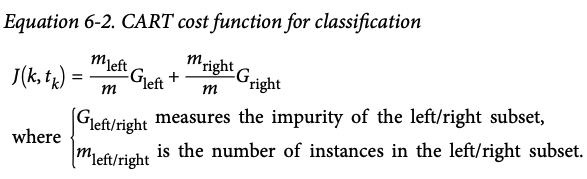

Once the training set is successfully split into two, it splits the subsets using the same logic. Once the recursion reaches the max depth (defined by the max_depth hyperparameter), or if it canot find a split that will reduce impurity, it will stop. 

note: the CART algo is a greedy algo: it greedily searches for optimum split at the top level, then repeats at subsequent levels. It doesn't check whether or not the split will lead to the lowest possible impurity several levels down. A greedy algo prodcues a good solution, but doesn't guartee the optimal one. 

Find the optimal tree is an NP-Complete rpoblem It requires O(exp(m)) time --this makes the problem intractable even fro fairly small training sets. 

## Computational Complexity

Making predictions with decision trees requires traversing the Decision Tree from root to leaf. Traversing Decision trees requires going thru roughly O(log<sub>2</sub>(m)) nodes --this is b/c you branch off into two for every node m (which is better than linear time --think of ripping the phone book into halves!). Hence, predictions are very fast. 

The training algo compares all features on all samples at each node. Hence, the training complexity is O(n × m log(m)). Sklearn can speed upo training for small training sets by presorting the data (set presort = True) but this slows down traiing a lot for larger training sets. 

## Gini Impurtiy or Entropy?

Entropy -- another measure of impurity. A set's entropy = 0 when it contains instances of only one class. Eq below shows def of the entropy in the ith node.

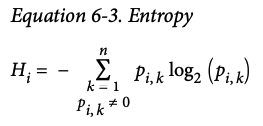

So when should you use Entropy vs Gini to find impurity? 

They both lead to similar graphs, but Gini is slighly faster to compute making it a good default. However, Gini tends to isolate the most frequet class in its own branch while entropy tends to produce slighly more balanced trees. 

## Regularization Hyperparamters

since decision tree by default make very little assumptions about the training data (as oppossed to linear models --which assume the data is linear), if left uncontrained, the tree structure will overfit the data. This type of model is called nonparametric model becuase the parameters are not determined prior to training. Linear model by contrast are called parameteric models. 

To avoid overfitting, you need to regularize using hyperparameters --e.g., set a max depth fro the decision tree or min_sample_split which specifies the min number of instances a node must have before it can split or min_sample_leaf or many other hyperparameters that you could read about. 

Another strat is to first train the decision tree to overfit, then pruning the leaves in which the purity improvement is not significant. 

Heres the differnce that regularizations can have on a model:
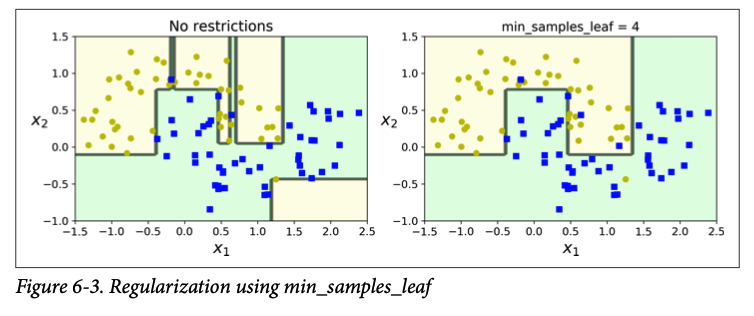


## Regression

Deicision Trees can also perform regression tasks:

In [11]:
# Here, we data from am noisy quadratic formula:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth = 2)
tree_reg.fit(X,y)

DecisionTreeRegressor(max_depth=2)

Here is the tree we made:

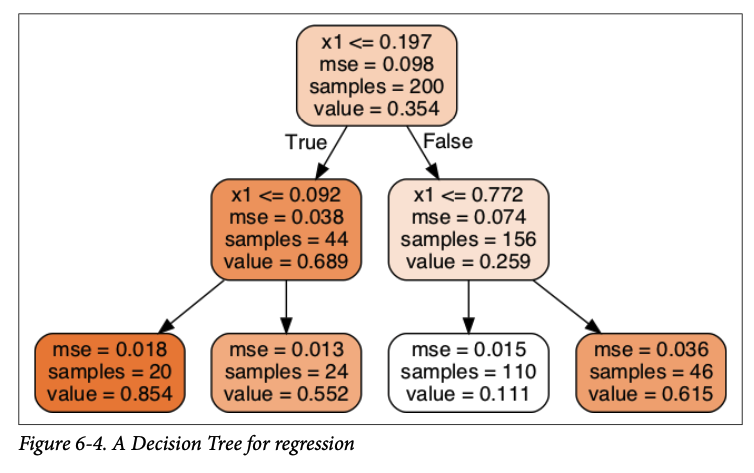
This tree looks V similar to classification tree we built earlier. The main difference is that instead of predicting a class in each node (w/ the Value), we are predciting values. The predicted value is simply the avg target value of the 110 training instances associated to the leaf node. The MSE is provided over the instances. 

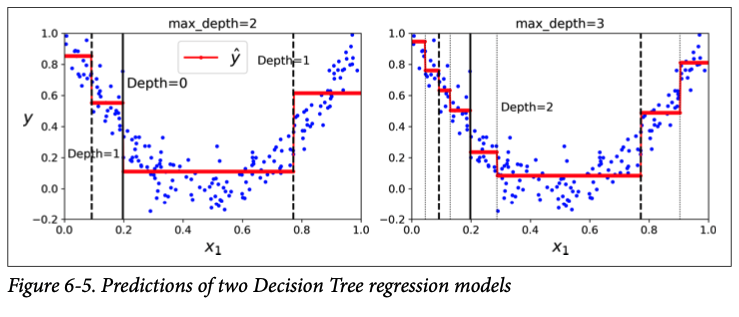

Here in the second graph, the model's predicctions are presented at a depth of 2 and 3. Notice that the predicted values are always teh avg target value of the instances in the region. 


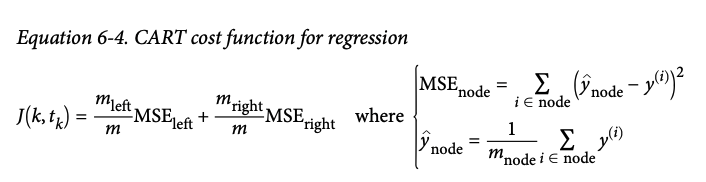

the CART algo works in much the same way as for classifiers except instead of splitting training sets based on minimizing impurity, splits are based on minimizing MSE. Above is the cost function that the algo tries to minimize. 

## Limitations of Decision Trees: Instability

Trees love orthogonal decision boundaries (all splits perpendicular to an axis) which makes them sensitve to training set rotation. E.g. when the training set is rotated 45 degrees, you can see that it doesn't generalize well anymore. Compare the left and right graph:

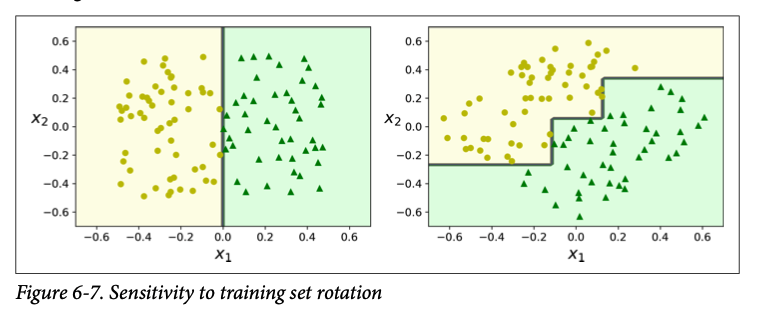

The trees are also V sensitive to small variations in the training data. Overall, trees can be pretty unstable even giving you very differnt models even on the same training data (unless you use random_state hyperparam). 

In the next chapter, we will see how Random Forest can limit this instability by avg predictions over many tress. 

## Exersizes 
(see page 189)